**Correlation Analysis**

*Objective* : Understand relationships between different variables.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('SP 500 ESG Risk Ratings.csv')

In [3]:
# Compute the correlation matrix
# Check for null values
null_values = df.isna().sum()
columns_with_null = null_values[null_values > 0]

# Display columns with null values
print("Columns with null values:")
print(columns_with_null)

Columns with null values:
Address                     1
Sector                      1
Industry                    1
Full Time Employees         5
Description                 1
Total ESG Risk score       73
Environment Risk Score     73
Governance Risk Score      73
Social Risk Score          73
Controversy Level          73
Controversy Score         100
ESG Risk Percentile        73
ESG Risk Level             73
dtype: int64


In [4]:
# Impute missing values
for column, count in columns_with_null.items():
    if df[column].dtype == 'object':  # Handling categorical columns
        # Fill with mode (most frequent value)
        mode_value = df[column].mode()[0]
        df[column] = df[column].fillna(mode_value)
    else:  # Handling numerical columns
        # Fill with mean
        mean_value = df[column].mean()
        df[column] = df[column].fillna(mean_value)

# Verify null values after imputation
print("\nNull values after imputation:")
print(df.isna().sum())


Null values after imputation:
Symbol                    0
Name                      0
Address                   0
Sector                    0
Industry                  0
Full Time Employees       0
Description               0
Total ESG Risk score      0
Environment Risk Score    0
Governance Risk Score     0
Social Risk Score         0
Controversy Level         0
Controversy Score         0
ESG Risk Percentile       0
ESG Risk Level            0
dtype: int64


In [5]:
print(df.columns)

Index(['Symbol', 'Name', 'Address', 'Sector', 'Industry',
       'Full Time Employees', 'Description', 'Total ESG Risk score',
       'Environment Risk Score', 'Governance Risk Score', 'Social Risk Score',
       'Controversy Level', 'Controversy Score', 'ESG Risk Percentile',
       'ESG Risk Level'],
      dtype='object')


In [6]:
# Remove commas from 'Full Time Employees' column and convert to integer
df['Full Time Employees'] = df['Full Time Employees'].str.replace(',', '').astype(int)

In [7]:
# Exclude non-numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_df = df[numeric_columns]
print(numeric_df.columns)

Index(['Full Time Employees', 'Total ESG Risk score', 'Environment Risk Score',
       'Governance Risk Score', 'Social Risk Score', 'Controversy Score'],
      dtype='object')


In [8]:
# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

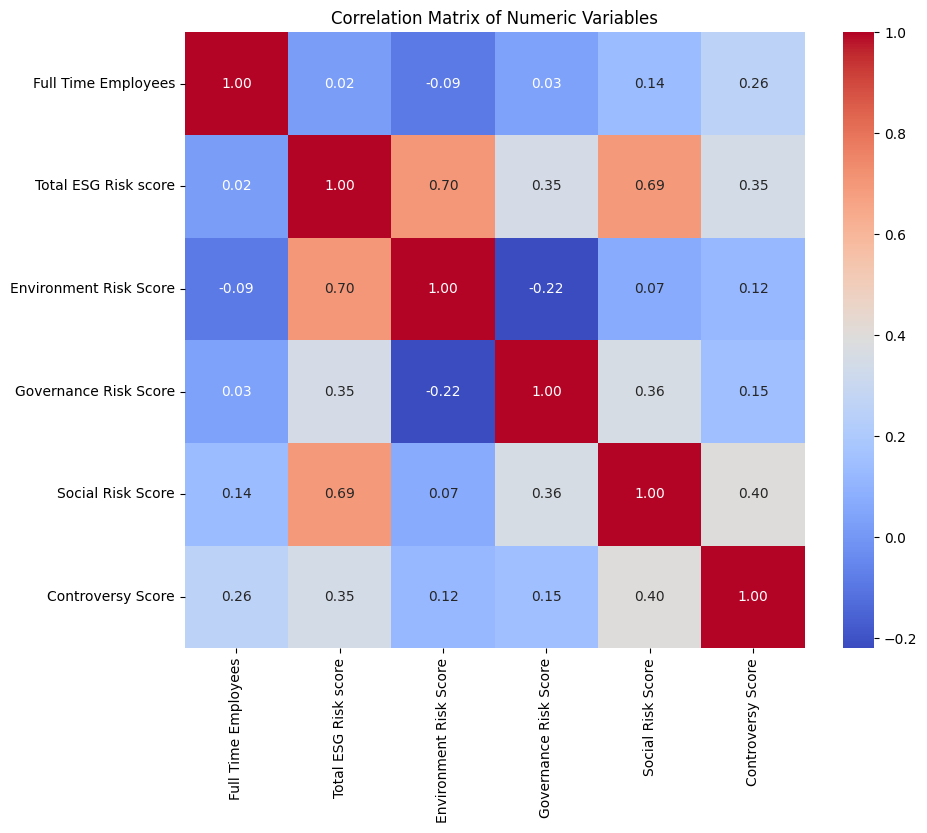

In [9]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

Above is a heatmap showing the correlation coefficients between all pairs of numeric variables in your dataset. The values range from -1 to 1, where:

1 indicates a perfect positive correlation,

-1 indicates a perfect negative correlation, and

0 indicates no correlation.

You can use this heatmap to identify any strong relationships between variables, including the relationship between "Full Time Employees" and "ESG Risk Percentile". A higher absolute value of the correlation coefficient indicates a stronger relationship.

In [10]:
# Identify correlation coefficient between 'Full Time Employees' and 'ESG Risk Percentile'
correlation_coefficient = correlation_matrix.loc['Full Time Employees', 'Social Risk Score']

# Print the correlation coefficient
print(f"Correlation coefficient between 'Full Time Employees' and 'Social Risk Score': {correlation_coefficient}")

# Interpret the strength of the relationship
if correlation_coefficient > 0.5:
    print("There is a strong positive relationship between 'Full Time Employees' and 'Social Risk Score'.")
elif correlation_coefficient < -0.5:
    print("There is a strong negative relationship between 'Full Time Employees' and 'Social Risk Score'.")
elif abs(correlation_coefficient) < 0.5:
    print("There is a weak relationship between 'Full Time Employees' and 'Social Risk Score'.")
else:
    print("There is no significant relationship between 'Full Time Employees' and 'Social Risk Score'.")


Correlation coefficient between 'Full Time Employees' and 'Social Risk Score': 0.1367130384004883
There is a weak relationship between 'Full Time Employees' and 'Social Risk Score'.
